In [1]:
# Williams %R and symmetric triangle patterns between two periods 2017 and 2024 for XRP

In [2]:
! pip install yfinance pandas numpy matplotlib scipy

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


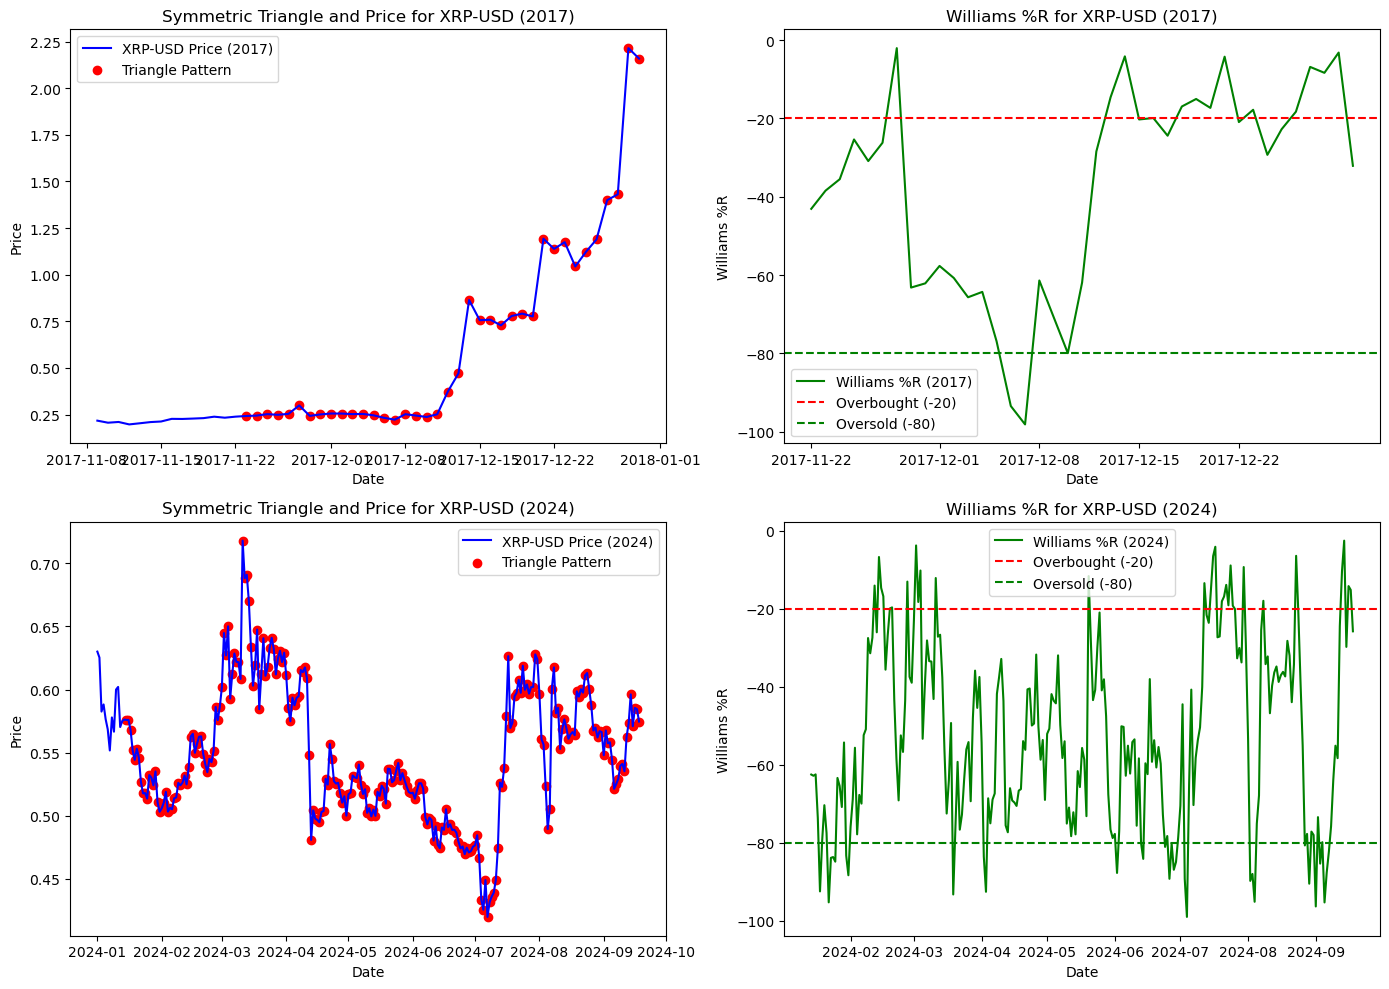

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Fetch historical data for a given ticker
def fetch_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Calculate Williams %R
def williams_r(data, lookback_period=14):
    highest_high = data['High'].rolling(window=lookback_period).max()
    lowest_low = data['Low'].rolling(window=lookback_period).min()
    williams_r = (highest_high - data['Close']) / (highest_high - lowest_low) * -100
    data['Williams %R'] = williams_r
    return data

# Detect symmetric triangle pattern
def detect_symmetric_triangle(data, lookback_period=14):
    data['min'] = data['Low'][argrelextrema(data['Low'].values, np.less_equal, order=lookback_period)[0]]
    data['max'] = data['High'][argrelextrema(data['High'].values, np.greater_equal, order=lookback_period)[0]]
    
    # Remove NaN values
    data['min'] = data['min'].dropna()
    data['max'] = data['max'].dropna()

    # Detect symmetric triangles by comparing slopes of lower highs and higher lows
    triangles = []
    for i in range(lookback_period, len(data)):
        if data['min'].iloc[i] and data['max'].iloc[i]:
            triangles.append(i)
    
    return triangles

# Plot Williams %R and Symmetric Triangle for two periods
def plot_comparison(data1, data2, triangles1, triangles2, ticker, period1, period2):
    plt.figure(figsize=(14, 10))
    
    # Plot price and triangle patterns for period 1
    plt.subplot(2, 2, 1)
    plt.plot(data1['Close'], label=f'{ticker} Price ({period1})', color='blue')
    plt.scatter(data1.iloc[triangles1].index, data1['Close'].iloc[triangles1], color='red', marker='o', label='Triangle Pattern')
    plt.title(f'Symmetric Triangle and Price for {ticker} ({period1})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    
    # Plot Williams %R for period 1
    plt.subplot(2, 2, 2)
    plt.plot(data1['Williams %R'], label=f'Williams %R ({period1})', color='green')
    plt.axhline(-20, color='red', linestyle='--', label='Overbought (-20)')
    plt.axhline(-80, color='green', linestyle='--', label='Oversold (-80)')
    plt.title(f'Williams %R for {ticker} ({period1})')
    plt.xlabel('Date')
    plt.ylabel('Williams %R')
    plt.legend()
    
    # Plot price and triangle patterns for period 2
    plt.subplot(2, 2, 3)
    plt.plot(data2['Close'], label=f'{ticker} Price ({period2})', color='blue')
    plt.scatter(data2.iloc[triangles2].index, data2['Close'].iloc[triangles2], color='red', marker='o', label='Triangle Pattern')
    plt.title(f'Symmetric Triangle and Price for {ticker} ({period2})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    
    # Plot Williams %R for period 2
    plt.subplot(2, 2, 4)
    plt.plot(data2['Williams %R'], label=f'Williams %R ({period2})', color='green')
    plt.axhline(-20, color='red', linestyle='--', label='Overbought (-20)')
    plt.axhline(-80, color='green', linestyle='--', label='Oversold (-80)')
    plt.title(f'Williams %R for {ticker} ({period2})')
    plt.xlabel('Date')
    plt.ylabel('Williams %R')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main function to execute
def main():
    ticker = 'XRP-USD'
    
    # Define the two periods to compare
    period1_start = '2017-01-01'
    period1_end = '2017-12-31'
    
    period2_start = '2024-01-01'
    period2_end = '2024-12-31'
    
    lookback_period = 14
    
    # Fetch data for both periods
    data1 = fetch_data(ticker, period1_start, period1_end)
    data2 = fetch_data(ticker, period2_start, period2_end)
    
    # Calculate Williams %R for both periods
    data1 = williams_r(data1, lookback_period)
    data2 = williams_r(data2, lookback_period)
    
    # Detect symmetric triangle patterns for both periods
    triangles1 = detect_symmetric_triangle(data1, lookback_period)
    triangles2 = detect_symmetric_triangle(data2, lookback_period)
    
    # Plot the comparison
    plot_comparison(data1, data2, triangles1, triangles2, ticker, '2017', '2024')

if __name__ == "__main__":
    main()


In [4]:
# Code Explanation:
# fetch_data(): Fetches the historical data for both 2017 and 2024.
# williams_r(): Calculates Williams %R for each period.
# detect_symmetric_triangle(): Identifies symmetric triangle patterns by analyzing price convergence over a specific lookback period.
# plot_comparison(): Compares the Williams %R and symmetric triangle patterns between the two time periods in a side-by-side plot.

In [5]:
# How the Code Works:
# The script fetches data for XRP-USD for the two periods: 2017 and 2024.
# It calculates Williams %R and identifies potential symmetric triangle patterns for both periods.
# The results for each period are plotted side-by-side for easy comparison.

In [6]:
# Visualization:
# The output will show:
# Price action and symmetric triangles for both periods (2017 and 2024).
# Williams %R for both periods, showing overbought/oversold conditions alongside potential breakout patterns.